# Кластеризация. Домашнее задание

### Данные

В предложенных файлах информация с публичных слушаний Москвы по правилам землепользования и застройки (ПЗЗ). В них комментарии жителей города были застенагрофированы, проклассифицированы (за/против) и нанесены на карту. Данные предоставлены в 2 вариантах, для задания можно использовать любой:
* geo_comment.xlsx
    * **comment** - комментарий одного или списка жителей к проект
    * **multiplier** - количество авторов комментария (может быть 1, может быть список)
    * **x, y** - координаты адреса, по которому был дан определённой комментарий
    * **comment_class** - за (1) / против (-1)
* geo.xlsx - те же данные, но без текстов комментариев и по 1 голосу на строку (ранее в 1 строке могло быть **multiplier** > 1 голоса)
    * **x, y** - координаты адреса, по которому был дан определённой комментарий
    * **comment_class** - за (1) / против (-1)
    
### Обязательное задание

* визуально разделить город на районы безотносительно голосов (провести кластеризацию и вывести картинку)
* аналогично исследовать скопления голосов за и против отдельно
* *подобрать оптимальное число кластеров при помощи кода из тетрадки в конце занятия (оптимально)*
* приложить ноутбук

### Дополнительные задания
* найти наиболее активные в голосовании районы *(подсказка: DBSCAN, не плотные районы обозначены одной меткой и закрашены одним цветом, cmap='gray')*
* для тех, кто уже попробовал работу с текстом: выделить основные тематики комментариев жителей, можно использовать всю имеющуюся дополнительную информацию

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
from pylab import rcParams
rcParams['figure.figsize'] = (12, 9)

In [3]:
# загружаем данные
data = pd.read_excel('geo.xlsx')

In [4]:
data.head()

,x,y,comment_class
0,37.612416,55.777454,-1
1,37.612416,55.777454,-1
2,37.603298,55.742108,-1
3,37.558526,55.728758,-1
4,37.566431,55.731794,-1


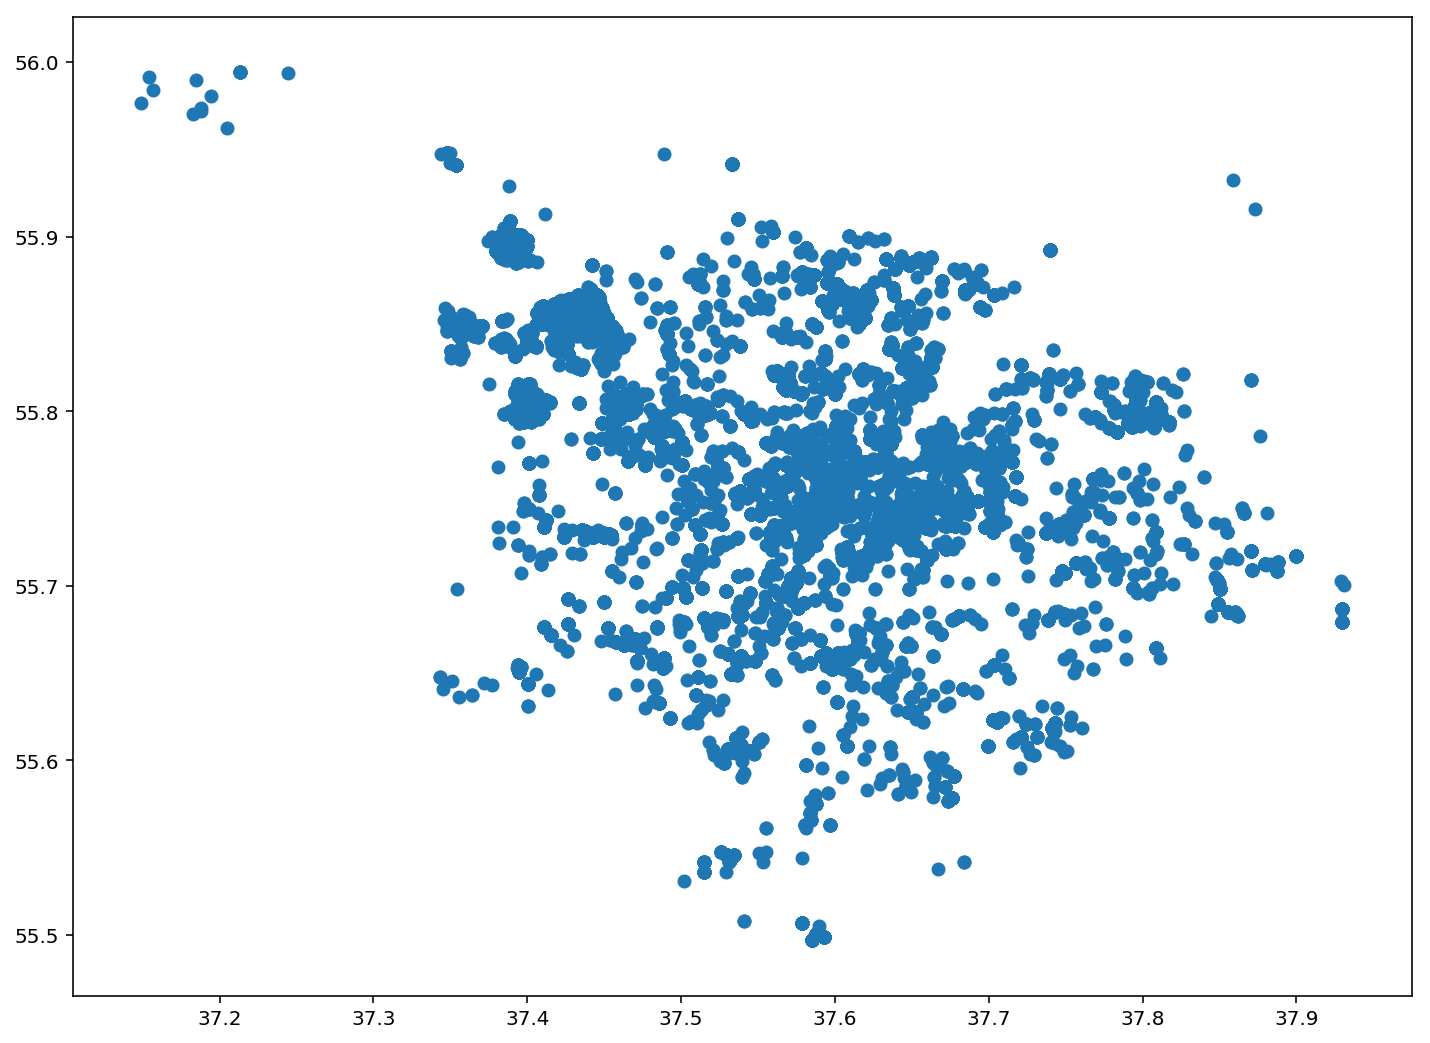

In [83]:
# визуализируем данные без разбиения по классам
plt.figure(figsize=(12,9))
plt.scatter(data.x, data.y)
plt.show()

In [6]:
# трансформируем и нормализуем данные
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = np.array(list(zip(np.array(data.x), np.array(data.y))))

X_scaled = scaler.fit_transform(X)

In [7]:
# разобьем город на кластеры
from sklearn.cluster import MiniBatchKMeans, DBSCAN, AffinityPropagation
from sklearn.metrics import adjusted_rand_score, silhouette_score

In [8]:
model_1 = MiniBatchKMeans(n_clusters=8)
clusters_1 = model_1.fit_predict(X_scaled)

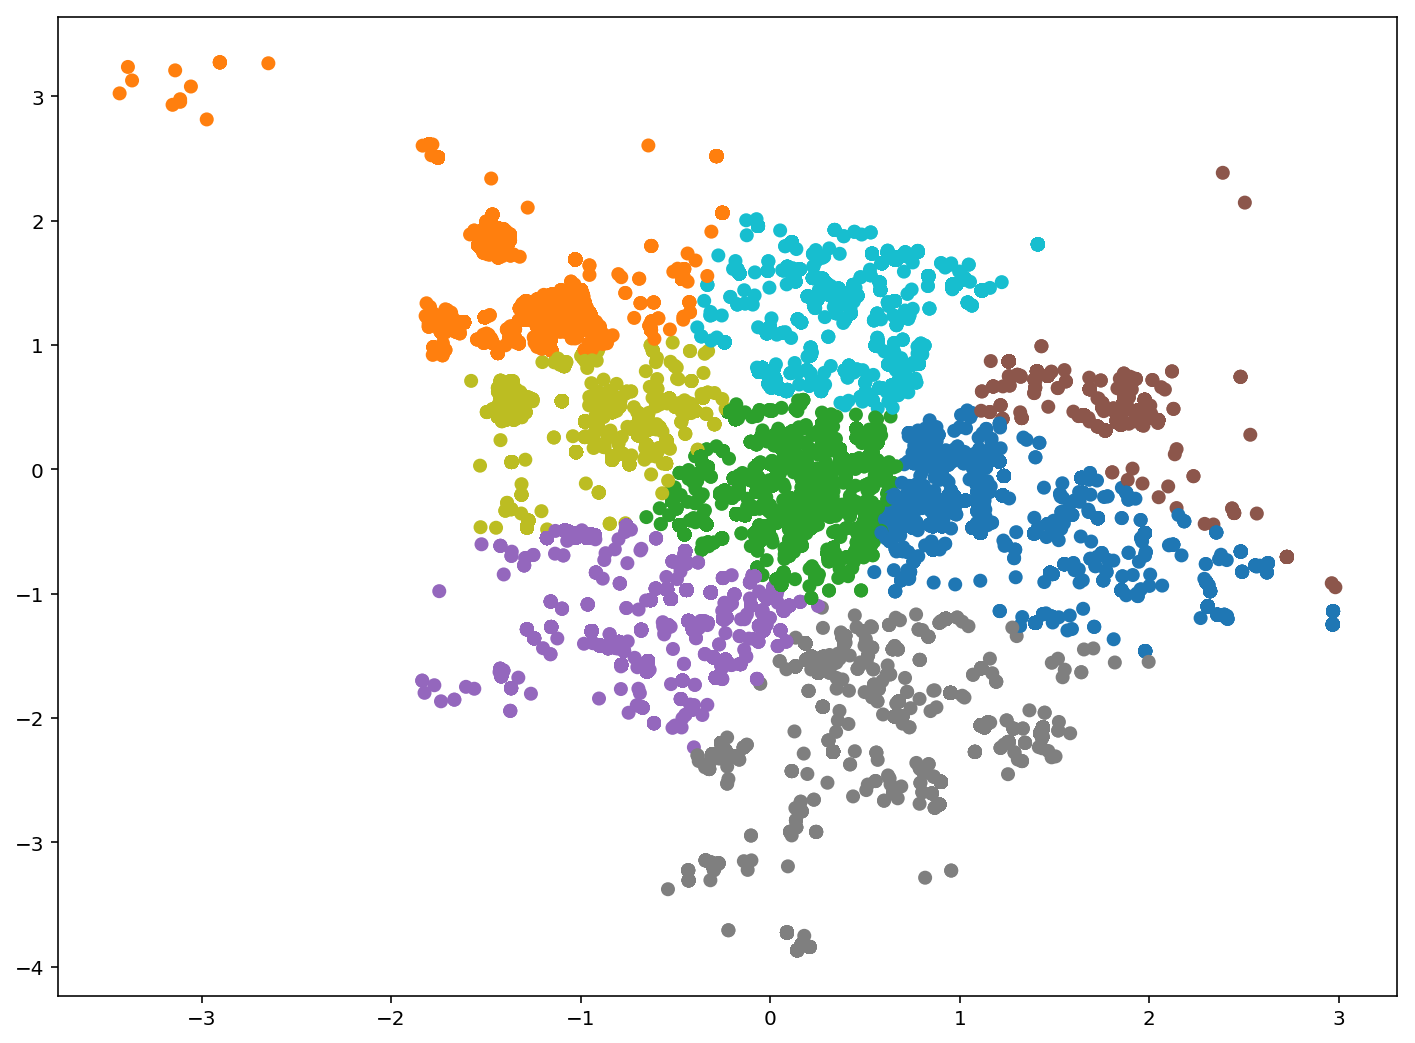

In [82]:
# визуализируем данные с разбиением по классам
plt.figure(figsize=(12,9))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters_1, cmap='tab10')
plt.show()

In [10]:
model_2 = DBSCAN(eps = 0.07)
clusters_2 = model_2.fit_predict(X_scaled)

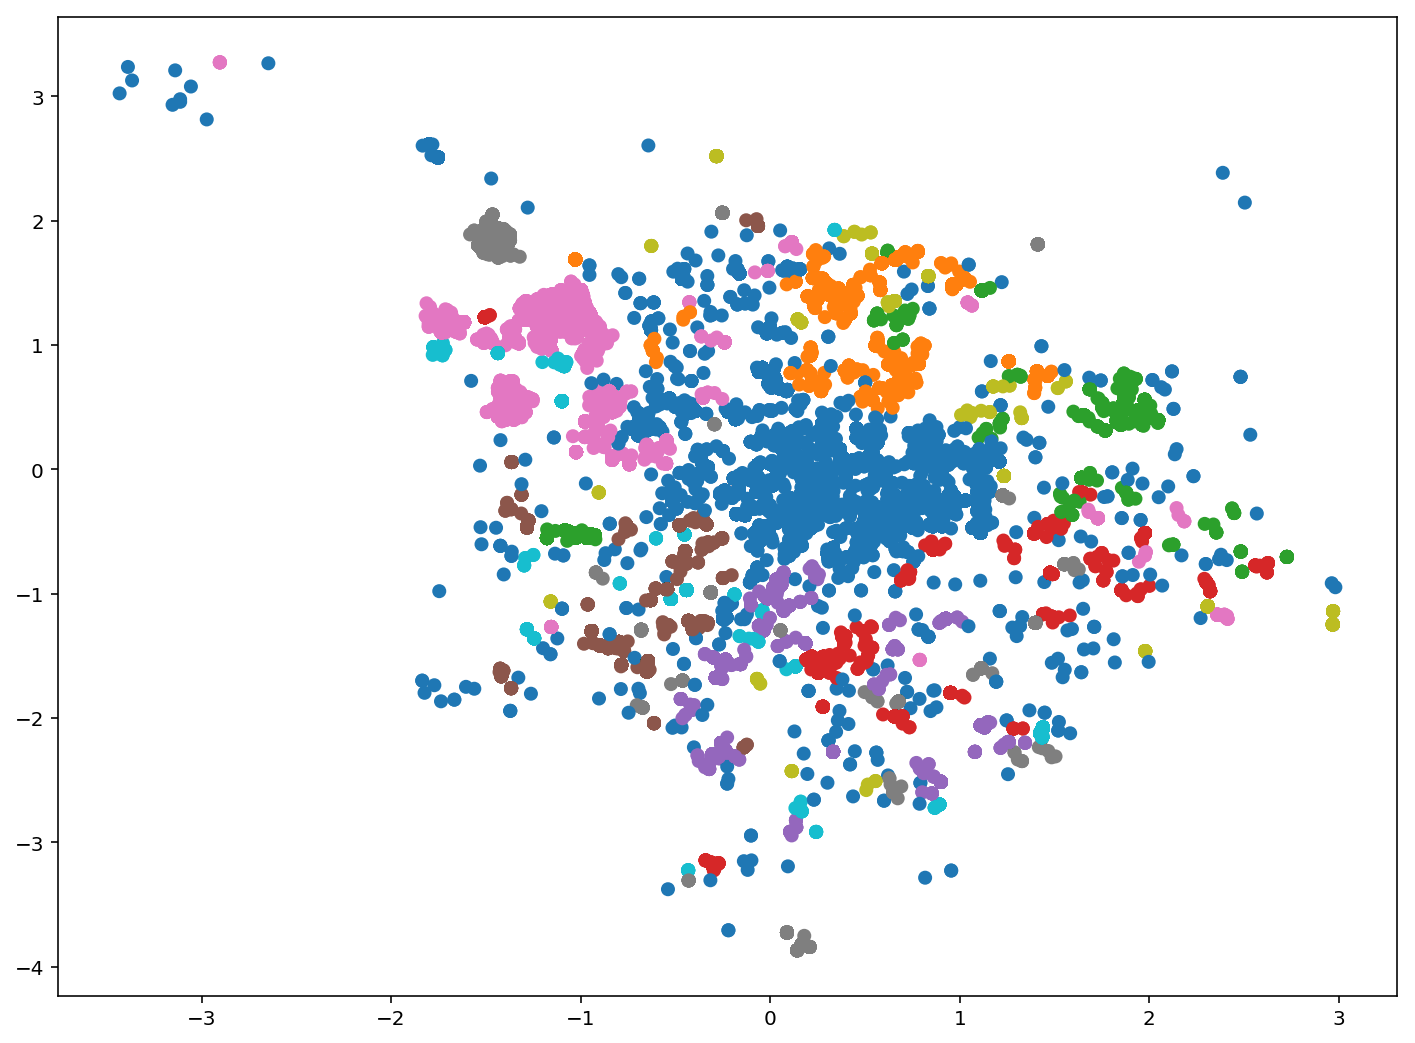

In [81]:
# визуализируем данные с разбиением по классам
plt.figure(figsize=(12,9))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters_2, cmap='tab10')
plt.show()

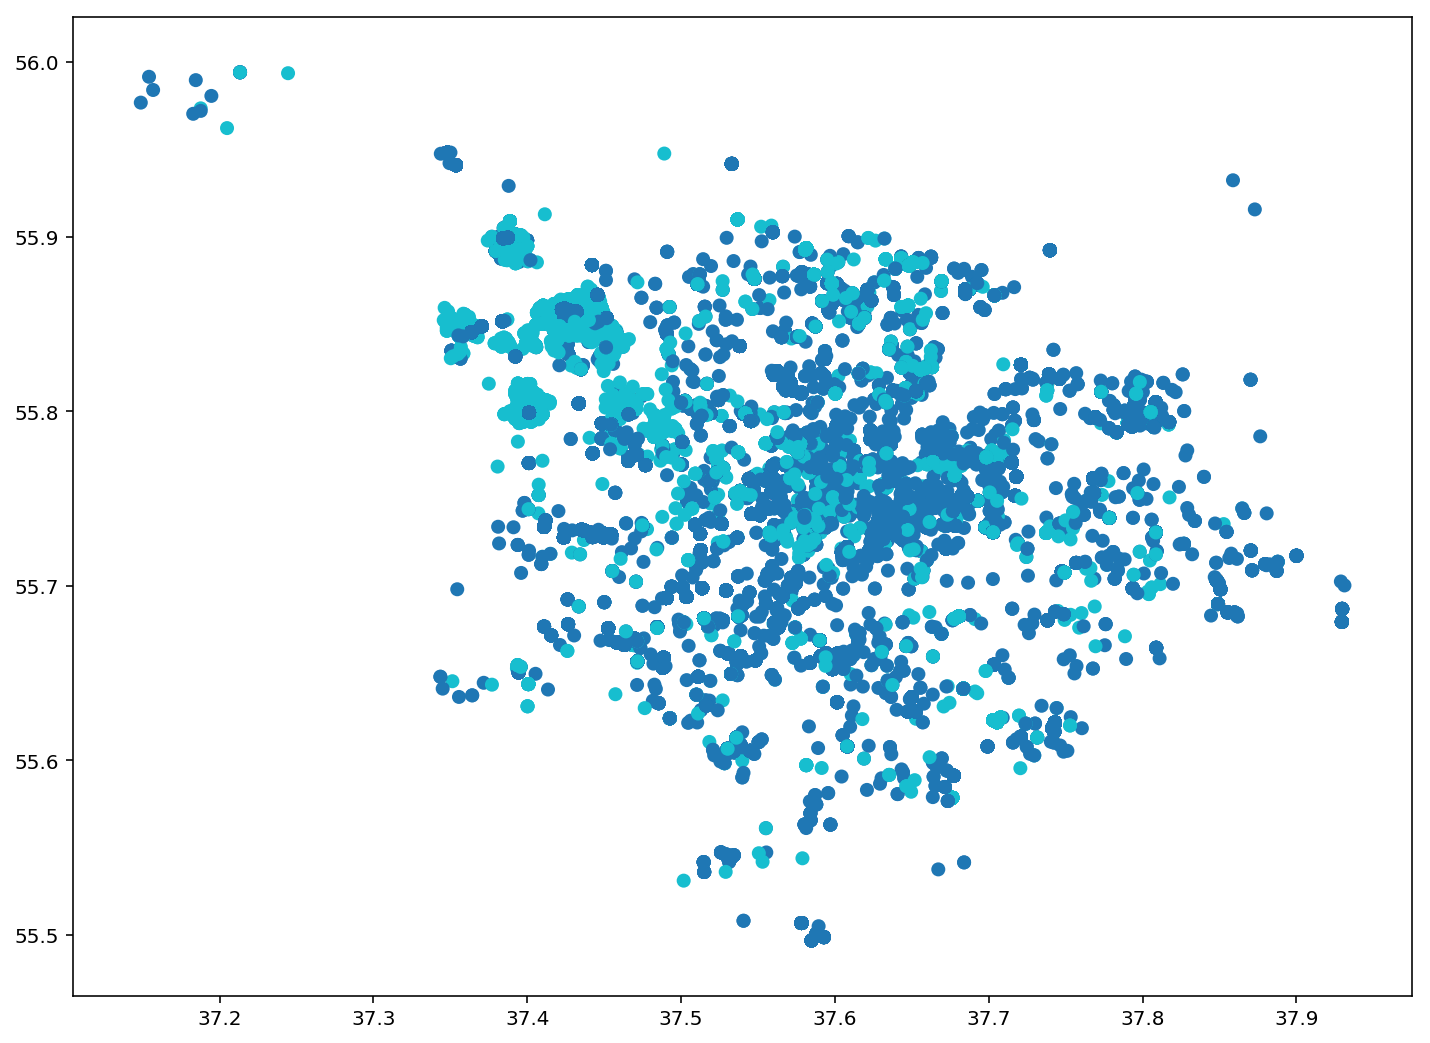

In [80]:
# визуализируем данные с разбиением по реальным классам
plt.figure(figsize=(12,9))
plt.scatter(data.x, data.y, c=data.comment_class, cmap='tab10')
plt.show()

In [13]:
# подбираем оптимальное число кластеров
k_inertia = []
ks = range(1,11)

for k in ks:
    clf_kmeans = MiniBatchKMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(X_scaled, )
    k_inertia.append(clf_kmeans.inertia_)

In [14]:
diff = np.diff(k_inertia)
diff_r = diff[1:] / diff[:-1]
k_opt = ks[np.argmin(diff_r)+1]
print('Оптимальное число кластеров:', k_opt)

Оптимальное число кластеров: 9


#### Разобьем датасет на 2 части, по типу ответа

In [20]:
data_for = data[data.comment_class == 1]

In [17]:
data_against = data[data.comment_class == -1]

In [19]:
# трансформируем и нормализуем данные
scaler = StandardScaler()
X_for = np.array(list(zip(np.array(data_for.x), np.array(data_for.y))))

X_for_scaled = scaler.fit_transform(X_for)

In [22]:
scaler = StandardScaler()
X_against = np.array(list(zip(np.array(data_against.x), np.array(data_against.y))))

X_against_scaled = scaler.fit_transform(X_against)

Анализируем голоса за

In [25]:
model_for_1 = MiniBatchKMeans(n_clusters=10)
clusters_for_1 = model_for_1.fit_predict(X_for_scaled)

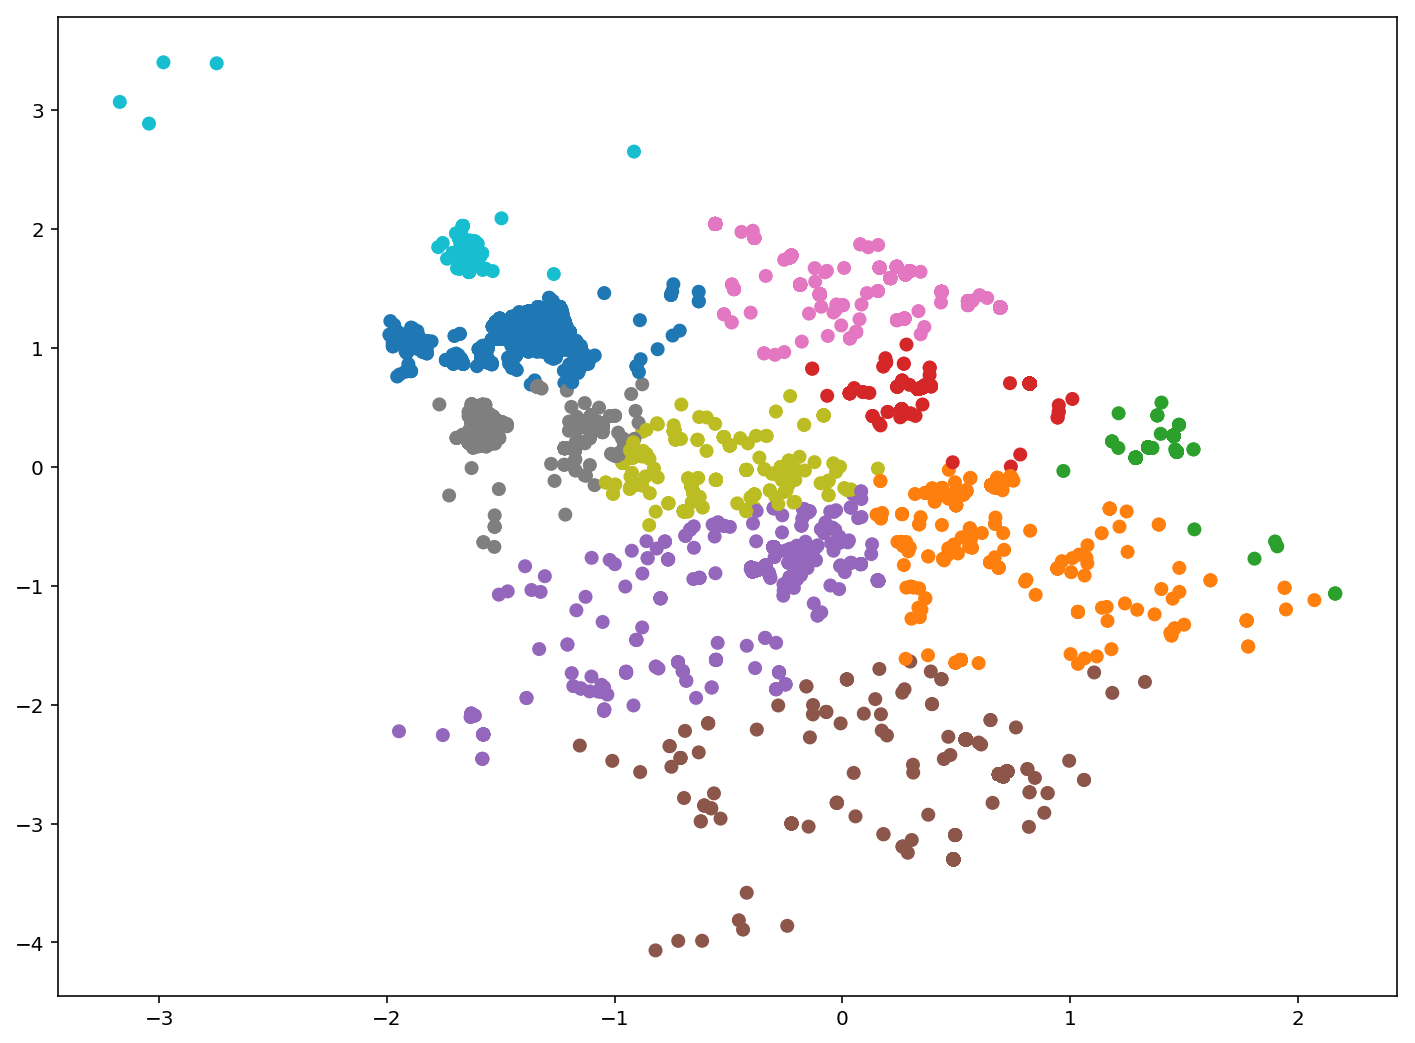

In [79]:
plt.figure(figsize=(12,9))
plt.scatter(X_for_scaled[:, 0], X_for_scaled[:, 1], c=clusters_for_1, cmap='tab10')
plt.show()

In [52]:
model_for_2 = DBSCAN(eps = 0.06)
clusters_for_2 = model_for_2.fit_predict(X_for_scaled)

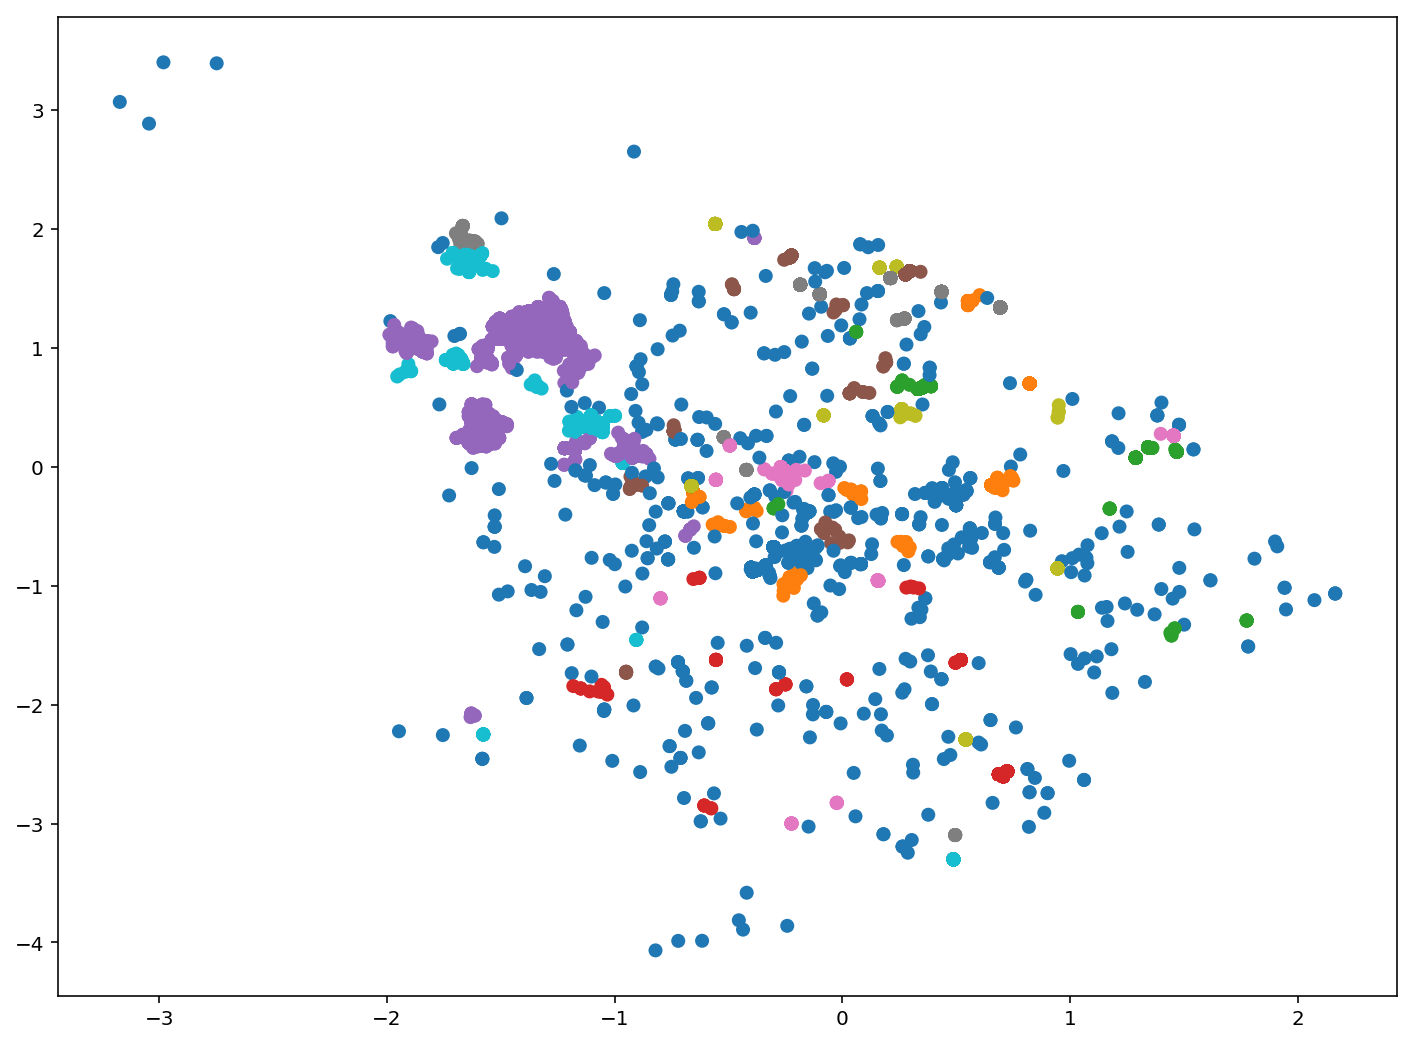

In [78]:
plt.figure(figsize=(12,9))
plt.scatter(X_for_scaled[:, 0], X_for_scaled[:, 1], c=clusters_for_2, cmap='tab10')
plt.show()

Можно увидеть, что район, где активно голосовали за, находится в верхней левой части, северо-западный район.

Теперь проведем анализ голосов против

In [54]:
model_against_1 = MiniBatchKMeans(n_clusters=10)
clusters_against_1 = model_against_1.fit_predict(X_against_scaled)

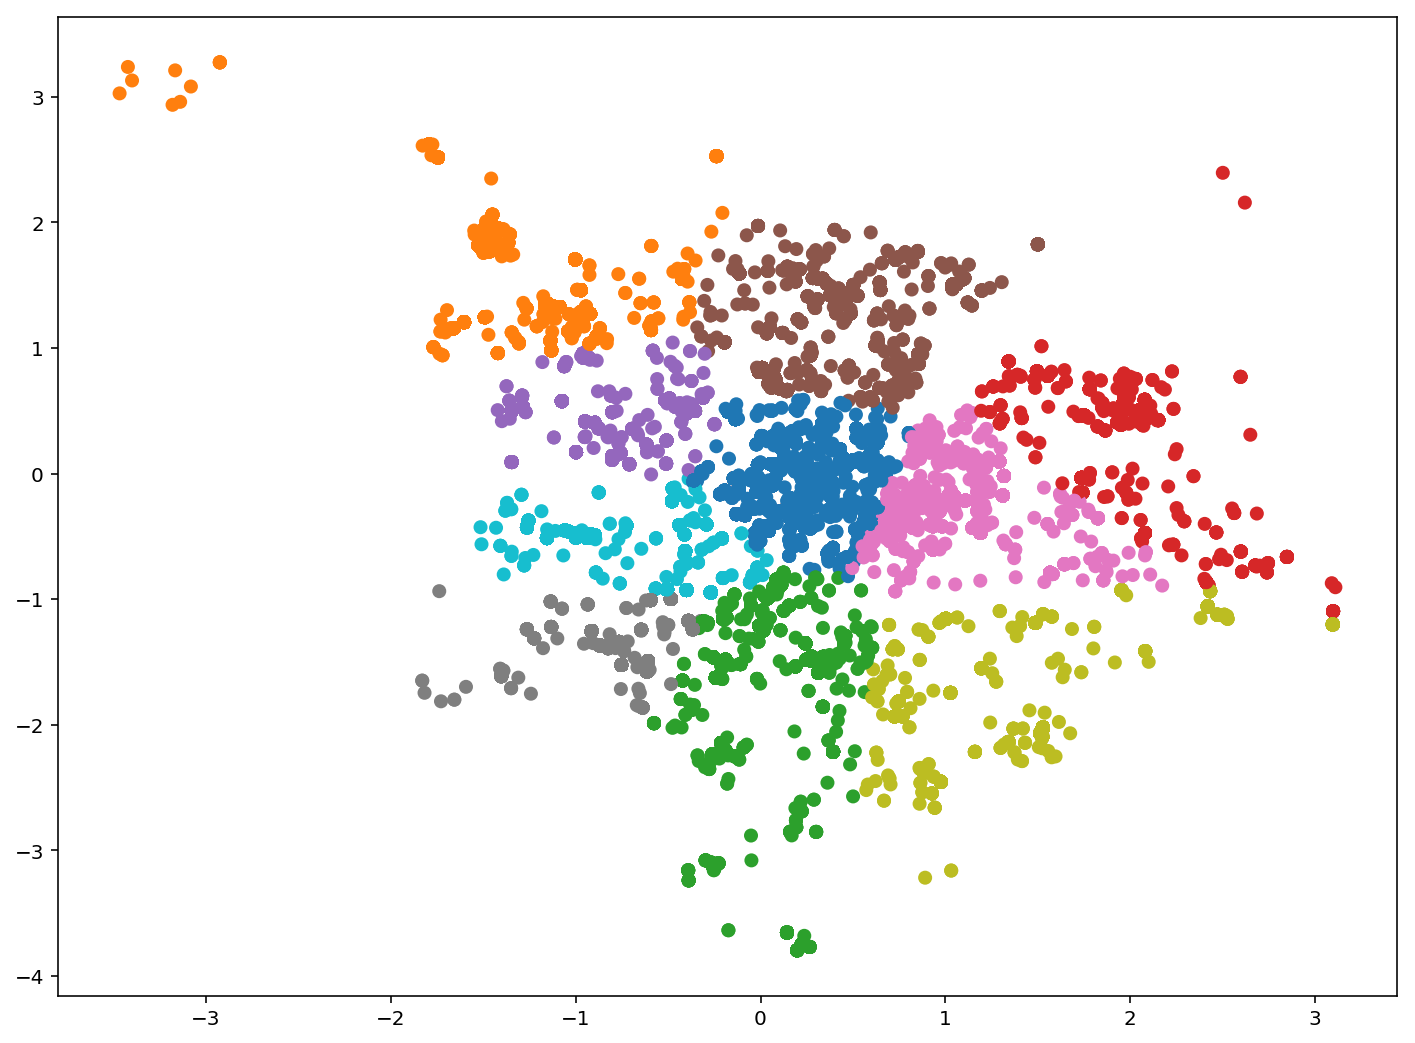

In [75]:
plt.figure(figsize=(12,9))
plt.scatter(X_against_scaled[:, 0], X_against_scaled[:, 1], c=clusters_against_1, cmap='tab10')
plt.show()

In [73]:
model_against_2 = DBSCAN(eps = 0.07)
clusters_against_2 = model_against_2.fit_predict(X_against_scaled)

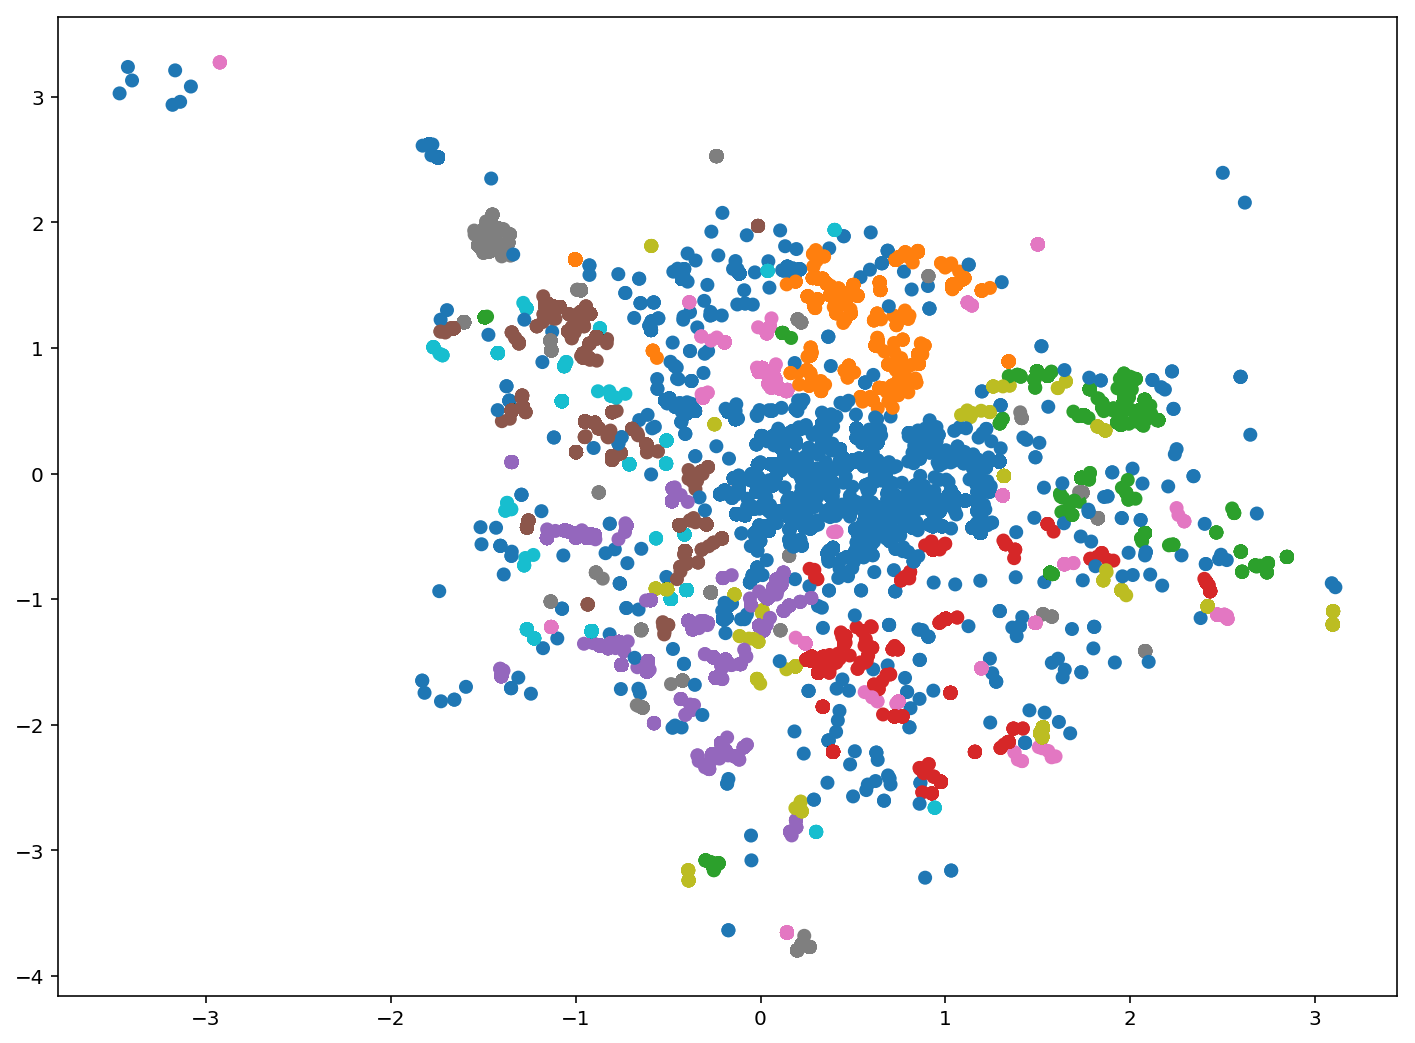

In [77]:
plt.figure(figsize=(12,9))
plt.scatter(X_against_scaled[:, 0], X_against_scaled[:, 1], c=clusters_against_2, cmap='tab10')
plt.show()

Против голосовали жители в центре города. Также, можно увидеть довольно плотный кластер на севере города.